### Análise dos dados

### Descrição de cada coluna
- product_category_name = categoria do produto
- product_category_name_english = categoria do produto em inglês 
- customer_id = id do consumidor
- customer_unique_id = id unico do consumidor
- customer_zip_code_prefix = codigo zip do consumidor
- customer_city = cidade do consumidor
- customer_state = estado do consumidor
- order_id = código id do pedido
- order_item_id = código id do item
- product_id = código id do produto
- seller_id = código id do vendedor
- shipping_limit_date = data limite de envio
- price = preço
- freight_value = preço do frete
- payment_sequential = quantidade de pagamentos
- payment_type = tipo de pagamento
- payment_installments = quantidade de parcelas do pagamento
- payment_value = valor do pagamento
- review_id = código id da review
- review_score = avaliação da review
- review_comment_title = titulo da review
- review_comment_message = comentario da review
- review_creation_date = criação da review
- review_answer_timestamp = resposta da review
- order_status = estado da ordem
- order_purchase_timestamp = data e hora em que o pedido foi feito
- order_approved_at = data e hora em que o pedido foi aprovado
- order_delivered_carrier_date = data em que o pedido foi entregue à transportadora
- order_delivered_customer_date = data em que o pedido foi entregue ao cliente
- delivery_time = tempo total de entrega, calculado desde o momento em que o pedido foi feito até o momento em que foi entregue ao cliente
- delivery_time_model = tempo total estimado pela empresa para fazer a entrega
- product_name_lenght = comprimento do nome do produto
- product_description_lenght = comprimento da descrição do produto
- product_photos_qty = quantidade de imagens do produto
- product_weight_g = peso do produto
- product_length_cm = comprimento do produto
- product_height_cm = altura do produto
- product_width_cm = largura do produto
- seller_zip_code_prefix = código zip do vendedor
- seller_city = cidade do vendedor
- seller_state = estado do vendedor

OBS: Existiam no começo 7 colunas reptidas.

### Anotações diogo
- Criar coluna distância
- Criar colunas de dados das cidades
- Colcar cidade e estado onde ta vazio*
- Colunas categoricas: Plotar grafico de barras, ...
    binario
- Relações relevantes: Médias por cidade, 
- Tipo de grafico que mais gostam dispersão, colunas, pizzar e 
- Fluxo e grafos nadave

### Dados relevantes
- Preço do frete
- Tempo estimado
- Tempo real
- Distancia*
- Cidade do comprador e cidade do vendedor
- População/tamanho da cidade*
- Tipo de pagamento
- Categoria do produto
- Tamanho 
- Peso
- Avaliação

### Relações que possam fazer sentido
- Tempo estima x tempo real - 
- Distancia x tempo real - 
- Tipo de pagamento x tempo real - 
- Cidade do comprador x tempo real - 
- Cidade do vendedor x tempo real - 
- Avaliação x tempo real - 
- Categoria do produto x tempo real - 
- Peso x tempo real - 

- Tamanho x frete - 
- Peso x frete - 
- Categoria do produto x frete - 
- Tipo de pagamento x frete - 
- Categoria do produto x tempo real - 

In [1]:
# Realizando os imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Importando a dataBase e imprimindo
df = pd.read_excel('./baseDeDados/dataBaseTratada.xlsx')
df

,product_category_name,product_category_name_english,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,tempo_entrega_transportadora,tempo_aceitar_pedido,tempo_entrega_cliente
0,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,500,19,8,13,9350,maua,SP,2.366493,0.007431,6.062650
1,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,500,19,8,13,9350,maua,SP,2.366493,0.007431,6.062650
2,utilidades_domesticas,housewares,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,sao paulo,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,...,500,19,8,13,9350,maua,SP,2.366493,0.007431,6.062650
3,pet_shop,pet_shop,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,rio grande do norte,949d5b44dbf5de918fe9c16f97b45f8a,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,450,30,10,20,31842,belo horizonte,MG,3.745833,0.012419,9.450498
4,papelaria,stationery,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,sao paulo,ad21c59c0840e6cb83a9ceb5573f8159,1,65266b2da20d04dbe00c5c2d3bb7859e,...,250,51,15,15,8752,mogi das cruzes,SP,0.893113,0.042940,1.937824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67817,bebes,baby,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,11722,praia grande,sao paulo,63943bddc261676b46f01ca7ac2f7bd8,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,4950,40,10,40,17602,tupa,SP,1.425058,0.008090,20.760579
67818,eletrodomesticos_2,home_appliances_2,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,45920,alcobaça,bahia,83c1379a015df1e13d02aae0204711ab,1,b80910977a37536adeddd63663f916ad,...,13300,32,90,22,8290,sao paulo,SP,1.241782,0.012188,23.605451
67819,informatica_acessorios,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,cachoeiras de macacu,rio de janeiro,11c177c8e97725db2631073c19f07b62,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550,20,20,20,37175,ilicinea,MG,3.749097,0.005486,13.331840
67820,informatica_acessorios,computers_accessories,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,28685,cachoeiras de macacu,rio de janeiro,11c177c8e97725db2631073c19f07b62,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,6550,20,20,20,37175,ilicinea,MG,3.749097,0.005486,13.331840


<bound method Axes.plot of <Axes: >>

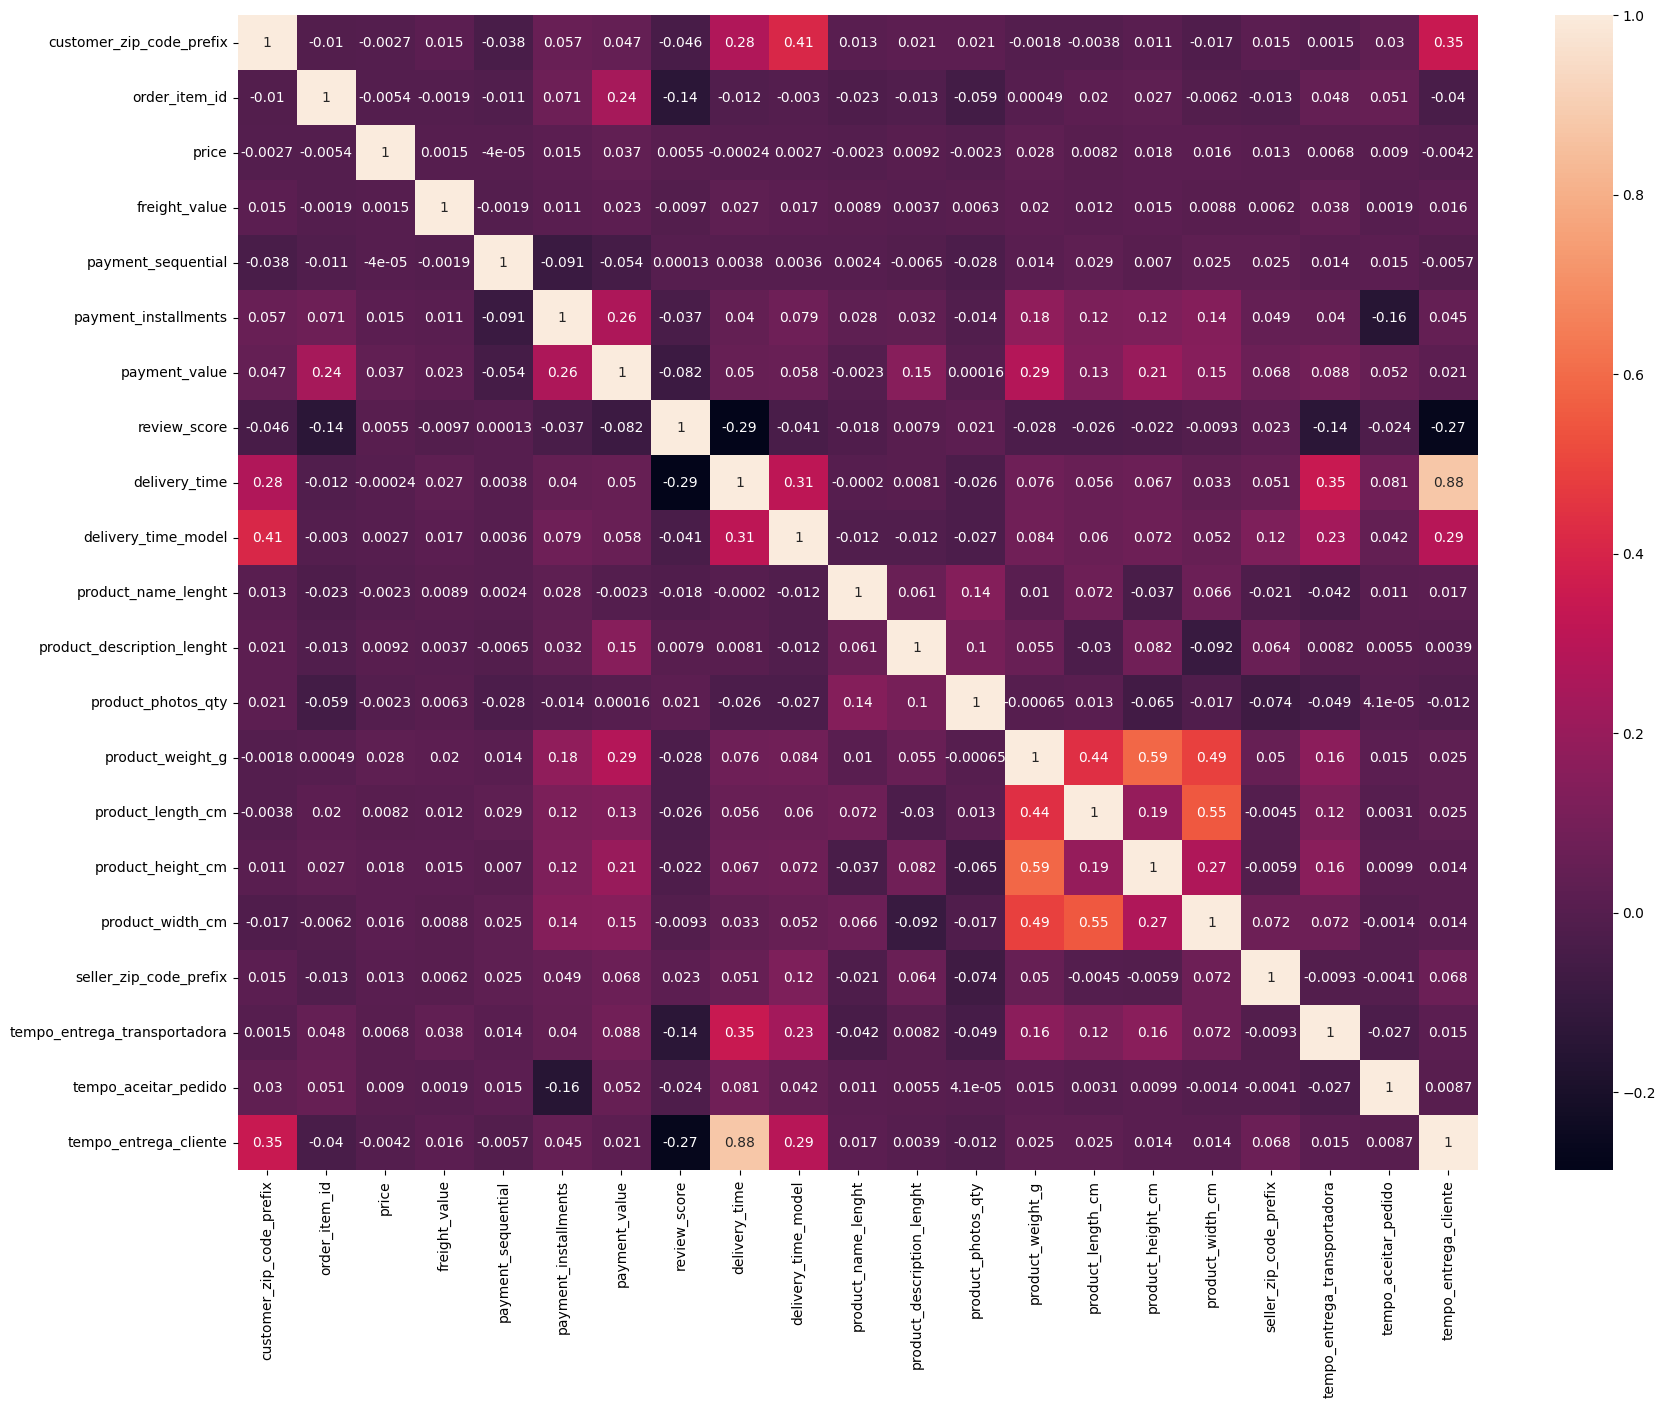

In [3]:
# Dataframe apenas com valores numericos
numericos = {}

for coluna in df.columns:
    if (str(df[coluna].dtypes)) == 'float64' or (str(df[coluna].dtypes)) == 'int64':
        numericos[coluna] = df[coluna]

dfNumerico = pd.DataFrame(data=numericos)

plt.figure(figsize=(20,15))
figure = sns.heatmap(dfNumerico.corr(), annot=True, vmax = 1)
figure.plot

In [38]:
# Calcular a correlação da coluna 'delivery_time_model' com todas as outras
correlacao_delivery_time = dfNumerico.corr()['delivery_time_model'].drop('delivery_time_model')

# Criar um DataFrame a partir da Série de correlação
correlacao_df = correlacao_delivery_time.reset_index()
correlacao_df.columns = ['Colunas', 'Correlação']

# Criar o gráfico de barras interativo usando Plotly
fig = px.bar(correlacao_df, x='Colunas', y='Correlação', title='Correlação de delivery_time_model com outras colunas',
             labels={'Colunas': 'Colunas', 'Correlação': 'Correlação'},
             color='Correlação', color_continuous_scale=px.colors.sequential.Viridis)

# Exibir o gráfico
fig.show()

Percebemos que o tempo de entrega apresenta uma baixa correlação com informações de id do produto, preço, quantidade de pagamentos, tamanho do nome do produto, tamanho da descrição do produto e quantidade de fotos do produto

Em relação as dimensões do produto, como seu tamanho e peso, a correlação é média. O mesmo acontece para dados de quantidades de parcelas, valor do pagamento, valor do frete e o CEP do vendedor.

Os dados de CEP do cliente, tempo estimado pela empresa e o tempo que o produto demora a chegar na transportadora após o pedido ser aprovado apresentam uma correlação maior com o tempo de entrega.

O review score apresenta uma relação inversamente proporcional ao tempo de entrega, o que faz sentido. Ou seja, quanto maior a nota do review, menor tende a ser o tempo de entrega.

Por fim, logicamente, o tempo que demora pro produto sair da transportadora e chegar no cliente é o que apresenta mair correlação com o tempo de entrega.

- Tempo estima MÉDIO x tempo real MÉDIO x VARIOS VALORES - 

- Distancia x tempo real - 
- Tipo de pagamento x tempo real MÉDIO - SEM relação
- Cidade do comprador x tempo real MÉDIO - SEM relação
- Cidade do vendedor x tempo real MÉDIO - SEM relação
- Avaliação x tempo real MÉDIO - INVERSAMENTE proporcionais
- Categoria do produto x tempo real MÉDIO - 
- Peso FAIXAS x tempo real - 

- Tamanho MÉDIO x frete MÉDIO - 
- Peso FAIXAS x frete MÉDIO - 
- Categoria do produto x frete MÉDIO - 
- Tipo de pagamento x frete MÉDIO - 
- Categoria do produto x frete MÉDIO - 

- Pedidos totais x cidade do comprador
- Pedidos totais x cidade do comprador x mes
- Pedidos totais x cidade do vendedor
- Pedidos totais x cidade do vendedor x mes

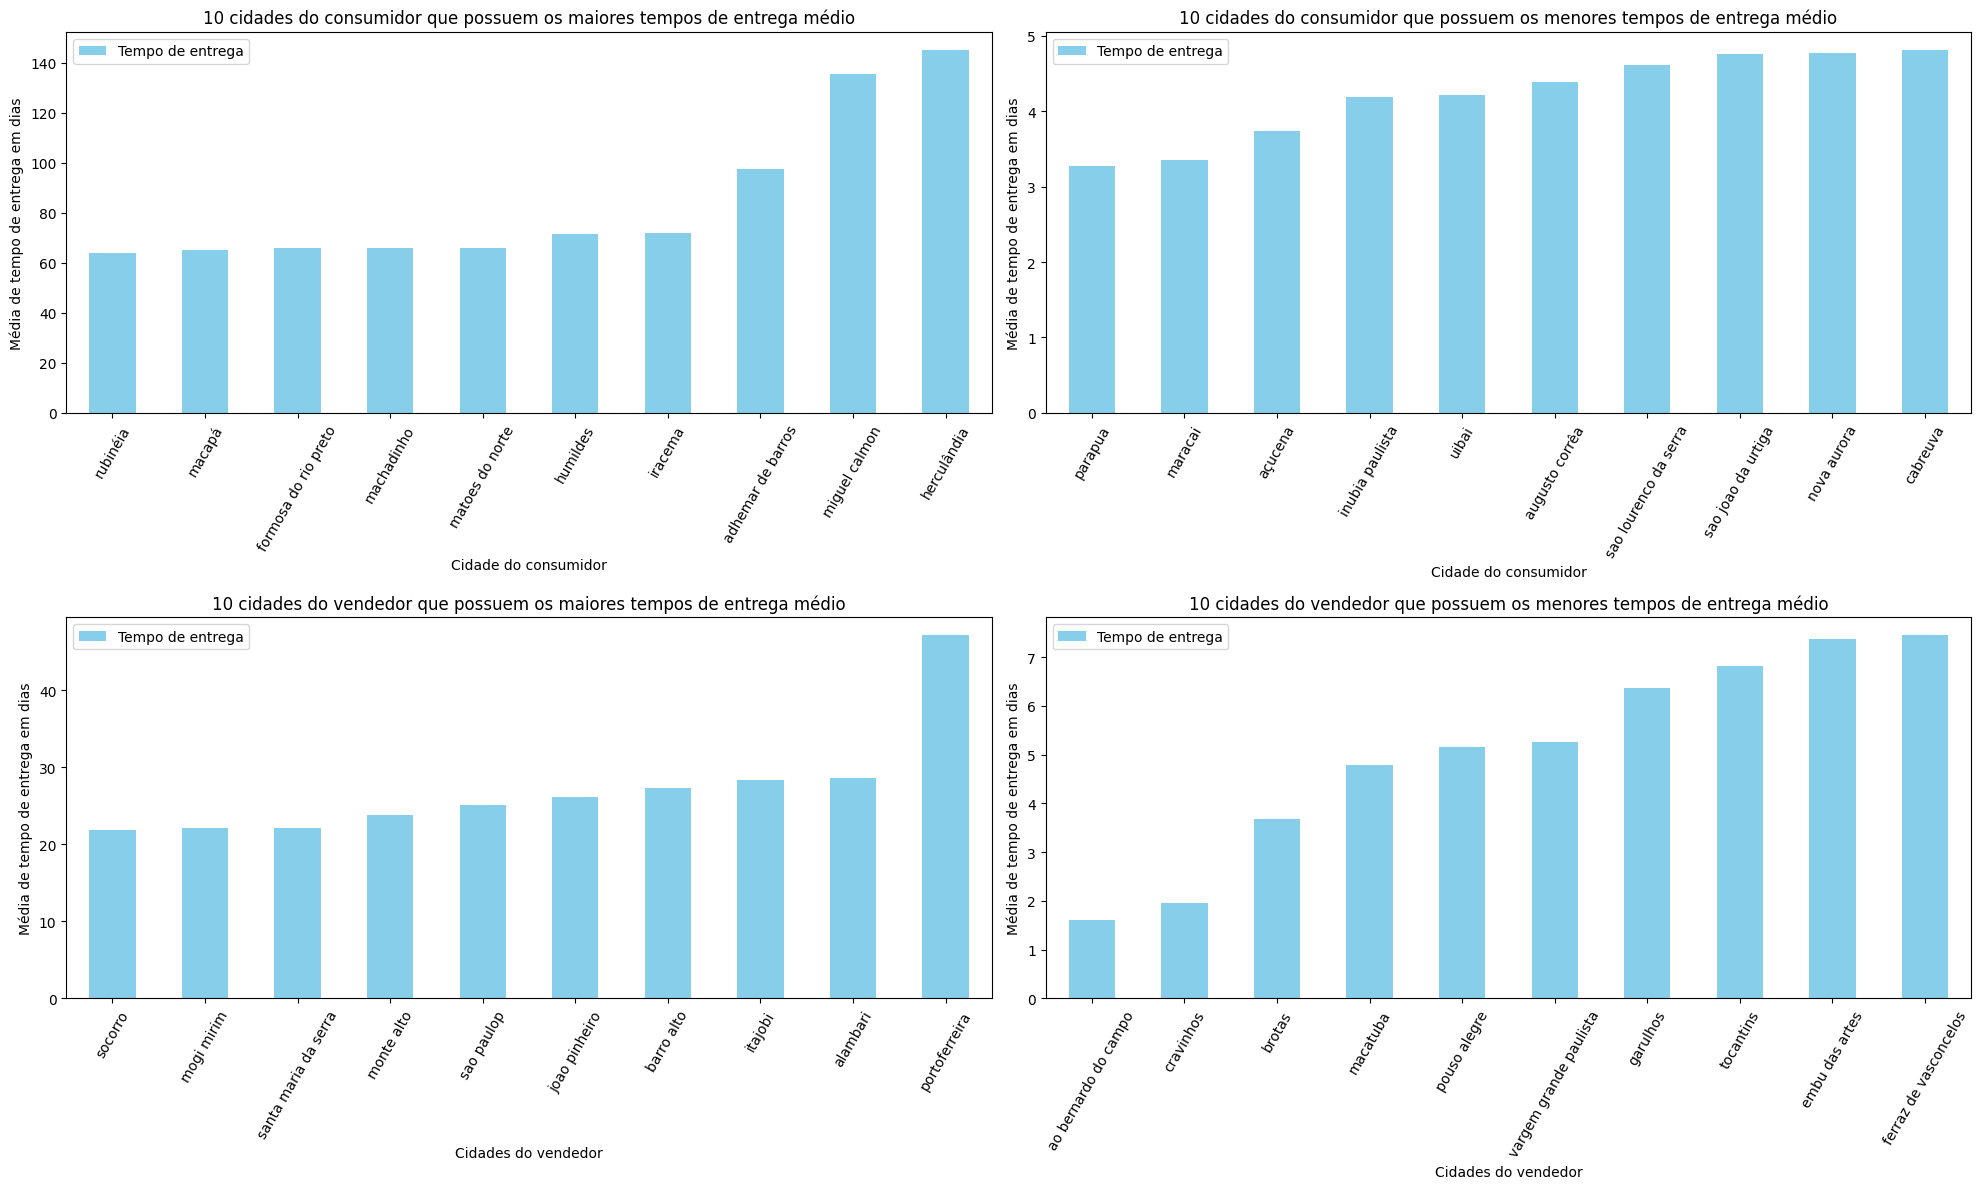

In [6]:
# Função para criar os gráficos
def create_bar_chart(ax, df, title, x_label, y_label, legend_label):
    df.plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(df.index, rotation=60)
    ax.legend([legend_label])

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Gráfico 1: 10 últimas cidades do comprador
dfCidComprador = df[['customer_city', 'delivery_time']].groupby(['customer_city']).mean()
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[-10:])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[0, 0], dfCidCompradorFINAL, '10 cidades do consumidor que possuem os maiores tempos de entrega médio', 'Cidade do consumidor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 2: 10 primeiras cidades do comprador
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[:10])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[0, 1], dfCidCompradorFINAL, '10 cidades do consumidor que possuem os menores tempos de entrega médio', 'Cidade do consumidor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 3: 10 últimos estados do vendedor
dfCidComprador = df[['seller_city', 'delivery_time']].groupby(['seller_city']).mean()
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[-10:])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[1, 0], dfCidCompradorFINAL, '10 cidades do vendedor que possuem os maiores tempos de entrega médio', 'Cidades do vendedor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

# Gráfico 4: 10 primeiros estados do vendedor
dfCidCompradorFINAL = dfCidComprador[dfCidComprador['delivery_time'].isin(sorted(dfCidComprador['delivery_time'])[:10])]
dfCidCompradorFINAL = dfCidCompradorFINAL.sort_values('delivery_time')
create_bar_chart(axes[1, 1], dfCidCompradorFINAL, '10 cidades do vendedor que possuem os menores tempos de entrega médio', 'Cidades do vendedor', 'Média de tempo de entrega em dias', 'Tempo de entrega')

fig.tight_layout()
plt.show()


In [7]:
# Relação dos top 10 inferiores e superiores de Categoria do produto x frete MÉDIO
dfFrete = df[['freight_value', 'product_category_name']].groupby(['product_category_name']).mean()

# Selecionando as 10 categorias com maiores valores de frete médio
top_10_freight = dfFrete.nlargest(10, 'freight_value')

# Selecionando as 10 categorias com menores valores de frete médio
bottom_10_freight = dfFrete.nsmallest(10, 'freight_value')

# Gráfico das 10 categorias com maiores valores de frete médio
fig_top = go.Figure(go.Bar(
    x=top_10_freight['freight_value'],
    y=top_10_freight.index,
    orientation='h',
    marker=dict(color='skyblue')
))
fig_top.update_layout(
    title='Top 10 Categorias com Maiores Valores de Frete Médio',
    xaxis_title='Frete Médio',
    yaxis_title='Categoria de Produto'
)

# Gráfico das 10 categorias com menores valores de frete médio
fig_bottom = go.Figure(go.Bar(
    x=bottom_10_freight['freight_value'],
    y=bottom_10_freight.index,
    orientation='h',
    marker=dict(color='lightcoral')
))
fig_bottom.update_layout(
    title='Top 10 Categorias com Menores Valores de Frete Médio',
    xaxis_title='Frete Médio',
    yaxis_title='Categoria de Produto'
)

fig_top.show()
fig_bottom.show()

In [8]:
# Gráfico de relação entre categorias e tempo real e estimado

# Supondo que df já está carregado
dfTempo = df[['delivery_time', 'delivery_time_model', 'product_category_name']].groupby(['product_category_name']).mean()

# Selecionar as 10 categorias com menores médias de tempo de entrega real e estimado
top10_categories_min = dfTempo.nsmallest(10, ['delivery_time', 'delivery_time_model']).index

# Selecionar as 10 categorias com maiores médias de tempo de entrega real e estimado
top10_categories_max = dfTempo.nlargest(10, ['delivery_time', 'delivery_time_model']).index

# Filtrar o DataFrame original para conter apenas essas categorias
dfTempo_min = dfTempo.loc[top10_categories_min].reset_index()
dfTempo_max = dfTempo.loc[top10_categories_max].reset_index()

# Reformatar os DataFrames para o formato longo necessário para o Plotly
dfTempo_long_min = pd.melt(dfTempo_min, id_vars=['product_category_name'], 
                           value_vars=['delivery_time', 'delivery_time_model'],
                           var_name='Tipo de Tempo', value_name='Tempo Médio')

dfTempo_long_max = pd.melt(dfTempo_max, id_vars=['product_category_name'], 
                           value_vars=['delivery_time', 'delivery_time_model'],
                           var_name='Tipo de Tempo', value_name='Tempo Médio')

# Mapear os valores da variável "Tipo de Tempo" para os novos rótulos
dfTempo_long_min['Tipo de Tempo'] = dfTempo_long_min['Tipo de Tempo'].map({
    'delivery_time': 'Tempo de entrega real',
    'delivery_time_model': 'Tempo de entrega estimado'
})

dfTempo_long_max['Tipo de Tempo'] = dfTempo_long_max['Tipo de Tempo'].map({
    'delivery_time': 'Tempo de entrega real',
    'delivery_time_model': 'Tempo de entrega estimado'
})

# Criar os gráficos
fig_min = px.histogram(dfTempo_long_min, x="product_category_name", y="Tempo Médio",
                       color="Tipo de Tempo", barmode='group', height=400,
                       labels={'product_category_name': 'Categoria de Produto', 'Tempo Médio': 'Tempo Médio (Unidade de Medida)'},
                       title='10 Categorias com Menores Médias de Tempo de Entrega')

fig_max = px.histogram(dfTempo_long_max, x="product_category_name", y="Tempo Médio",
                       color="Tipo de Tempo", barmode='group', height=400,
                       labels={'product_category_name': 'Categoria de Produto', 'Tempo Médio': 'Tempo Médio (Unidade de Medida)'},
                       title='10 Categorias com Maiores Médias de Tempo de Entrega')

# Mostrar os gráficos
fig_min.update_yaxes(title_text='Tempo Médio (Unidade de Medida)')
fig_max.update_yaxes(title_text='Tempo Médio (Unidade de Medida)')

fig_min.show()
fig_max.show()


### Análises com relação ao Tipo de Pagamento

In [9]:
# Calcular o tempo de entrega médio para cada tipo de pagamento
media_tempo_entrega_pagamento = df.groupby('payment_type')['delivery_time'].mean().reset_index()

# Calcular o frete médio para cada tipo de pagamento
media_frete_pagamento = df.groupby('payment_type')['freight_value'].mean().reset_index()

# Contar as vendas por tipo de pagamento
contagem_pagamentos = df['payment_type'].value_counts().reset_index()
contagem_pagamentos.columns = ['payment_type', 'quantidade_vendas']

fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=False,
    vertical_spacing=0.15,
    specs=[[{"type": "bar"}],
           [{"type": "bar"}],
           [{"type": "pie"}]]
)

fig.add_trace(
    go.Bar(
        x=media_tempo_entrega_pagamento['payment_type'], y=media_tempo_entrega_pagamento['delivery_time'], 
        text=media_tempo_entrega_pagamento['delivery_time'],
        textposition='outside',
        name='Tempo Médio de Entrega (dias)',
        marker=dict(color=px.colors.qualitative.Plotly),
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=media_frete_pagamento['payment_type'], y=media_frete_pagamento['freight_value'],
        text=media_frete_pagamento['freight_value'],
        textposition='outside',
        name='Frete Médio (R$)',
        marker=dict(color=px.colors.qualitative.Plotly),
    ),
    row=2, col=1
)

fig.add_trace(
    go.Pie(
        labels=contagem_pagamentos['payment_type'], values=contagem_pagamentos['quantidade_vendas'],
        name='Quantidade de Vendas por Tipo de Pagamento'
    ),
    row=3, col=1
)

# Atualizar layout para acomodar os três gráficos
fig.update_layout(
    title='Análise por Tipo de Pagamento',
    title_x = 0.525,
    template='plotly_white',
    height=1600,
    showlegend = False,
)

# Adiciona rótulos formatados para os gráficos de barras
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside', row=1, col=1)
fig.update_traces(texttemplate='%{y:.2f} R$', textposition='outside', row=2, col=1)

# Etiquetas nos eixos x e y para cada gráfico
fig.update_xaxes(title_text='Tipo de Pagamento', row=1, col=1)
fig.update_yaxes(title_text='Tempo Médio de Entrega (dias)', row=1, col=1)

fig.update_xaxes(title_text='Tipo de Pagamento', row=2, col=1)
fig.update_yaxes(title_text='Frete Médio (R$)', row=2, col=1)

fig.update_xaxes(title_text='Tipo de Pagamento', row=3, col=1)
fig.update_yaxes(title_text='Quantidade de Vendas', row=3, col=1)

fig.show()

Aparentemente não há nenhuma correlação forte entre o tempo de entrega e o tipo de pagamento, seja direta ou indiretamente

### Análise com relação ao Frete

In [10]:
df['product_weight_g'].describe()

count    67822.000000
mean      2192.658208
std       3879.759004
min          2.000000
25%        300.000000
50%        750.000000
75%       1825.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [11]:
# Calcular quartis e adicionar a coluna 'quartil' ao DataFrame
df_peso = df[['product_weight_g', 'freight_value']].copy()
df_peso['quartil'] = pd.qcut(df_peso['product_weight_g'], 4, labels=False)

# Calcular tempo de entrega médio por quartil
media_frete_peso = df_peso.groupby('quartil')['freight_value'].mean().reset_index()

# Definir os intervalos de cada quartil
quartil_pesos_label = {
    0: '2 - 300g',
    1: '300 - 750g',
    2: '750g - 1825g',
    3: '1825g - 40425g'
}

# Mapear os labels para os quartis
media_frete_peso['intervalo'] = media_frete_peso['quartil'].map(quartil_pesos_label)

# Plotar o gráfico de barras
fig = px.bar(media_frete_peso, x='quartil', y='freight_value',
             labels={'quartil': 'Quartil', 'freight_value': 'Frete Médio'},
             title='Frete Médio por Quartil de Peso',
             text='freight_value',  
             width=800, height=600,
             color='quartil',
             color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_frete_peso['quartil'], ticktext=media_frete_peso['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Ajustar layout
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [12]:
# Analisando apenas a correlações com informações de dimensão do produto
df_dimensao = df[['product_length_cm', 'product_height_cm', 'product_width_cm']].copy()

# Calculando o volume usando .loc
df_dimensao.loc[:, 'volume'] = df_dimensao['product_length_cm'] * df_dimensao['product_height_cm'] * df_dimensao['product_width_cm']

# Usando .loc para atribuir a coluna 'freight_value' 
df_dimensao.loc[:, 'freight_value'] = df['freight_value']

# Calcular tempo de entrega médio por quartil
df_dimensao['quartil'] = pd.qcut(df_dimensao['volume'], 4, labels=False)

In [13]:
df_dimensao['volume'].describe()

count     67822.000000
mean      16033.607266
std       24207.501487
min         352.000000
25%        2856.000000
50%        7200.000000
75%       19800.000000
max      294000.000000
Name: volume, dtype: float64

In [14]:
# Definir os intervalos de cada quartil
quartil_volumes_labels = {
    0: '352 - 2856 cm3',
    1: '2856 - 7200 cm3',
    2: '7200 - 19800 cm3',
    3: '19800 - 294000 cm3'
}

media_frete_volume = df_dimensao.groupby('quartil')['freight_value'].mean().reset_index()

media_frete_volume['intervalo'] = media_frete_volume['quartil'].map(quartil_volumes_labels)

fig = px.bar(media_frete_volume, x='quartil', y='freight_value',
            labels={'quartil': 'Quartil', 'freight_value': 'Frete Médio'},
            title='Frete Médio por Quartil de Volume',
            text='freight_value',  
            width=800, height=600,
            color='quartil',
            color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_frete_volume['quartil'], ticktext=media_frete_volume['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [15]:
# Calcular quartis e adicionar a coluna 'quartil' ao DataFrame
df_peso = df[['product_weight_g', 'delivery_time']].copy()
df_peso['quartil'] = pd.qcut(df_peso['product_weight_g'], 4, labels=False)

# Calcular tempo de entrega médio por quartil
media_tempo_peso = df_peso.groupby('quartil')['delivery_time'].mean().reset_index()

# Definir os intervalos de cada quartil
quartil_pesos_labels = {
    0: '2 - 300g',
    1: '300 - 750g',
    2: '750g - 1825g',
    3: '1825g - 40425g'
}

# Mapear os labels para os quartis
media_tempo_peso['intervalo'] = media_tempo_peso['quartil'].map(quartil_pesos_labels)

# Plotar o gráfico de barras
fig = px.bar(media_tempo_peso, x='quartil', y='delivery_time',
             labels={'quartil': 'Quartil', 'delivery_time': 'Tempo de Entrega Médio (dias)'},
             title='Tempo de Entrega Médio por Quartil de Peso',
             text='delivery_time',  
             width=800, height=600,
             color='quartil',
             color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_tempo_peso['quartil'], ticktext=media_tempo_peso['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Ajustar layout
fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [16]:
# Usando .loc para atribuir a coluna 'delivery_time' 
df_dimensao.loc[:, 'delivery_time'] = df['delivery_time']

df_dimensao['quartil'] = pd.qcut(df_dimensao['volume'], 4, labels=False)

# Definir os intervalos de cada quartil
quartil_volumes_labels = {
    0: '352 - 2856 cm3',
    1: '2856 - 7200 cm3',
    2: '7200 - 19800 cm3',
    3: '19800 - 294000 cm3'
}

media_tempo_volume = df_dimensao.groupby('quartil')['delivery_time'].mean().reset_index()

media_tempo_volume['intervalo'] = media_tempo_volume['quartil'].map(quartil_volumes_labels)

fig = px.bar(media_tempo_volume, x='quartil', y='delivery_time',
            labels={'quartil': 'Quartil', 'delivery_time': 'Tempo de Entrega Médio (dias)'},
            title='Tempo de Entrega Médio por Quartil de Volume',
            text='delivery_time',  
            width=800, height=600,
            color='quartil',
            color_discrete_sequence=px.colors.qualitative.Pastel)  

# Atualizar os rótulos do eixo x para mostrar os intervalos dos quartis
fig.update_xaxes(tickvals=media_tempo_volume['quartil'], ticktext=media_tempo_volume['intervalo'])

# Formatar o texto das barras
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    title_x=0.5,
    template='plotly_white'
)

fig.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 207


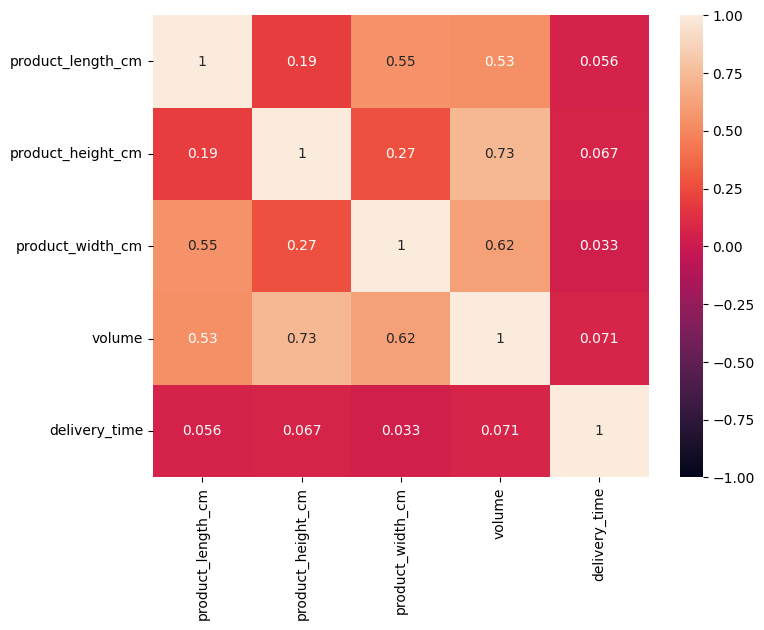

In [25]:
# Analisando melhor apenas a correlações com informações de dimensão do produto
# Criando df_dimensao como uma cópia para evitar SettingWithCopyWarning
df_dimensao = df[['product_length_cm', 'product_height_cm', 'product_width_cm']].copy()

# Calculando o volume usando .loc para evitar o aviso
df_dimensao.loc[:, 'volume'] = df_dimensao['product_length_cm'] * df_dimensao['product_height_cm'] * df_dimensao['product_width_cm']

# Usando .loc para atribuir a coluna 'delivery_time'
df_dimensao.loc[:, 'delivery_time'] = df['delivery_time']

plt.figure(figsize=(8,6))
sns.heatmap(df_dimensao.corr(), annot=True, vmin = -1, vmax = 1)
plt.show()

Percebemos que o frete não tem uma correlação muito grande com as informações de volume e peso. Já o tempo de entrega apresenta uma pequena proporção direta.

### Tempo médio para cada nota possível na avaliação

In [17]:
# Calcular a média do tempo de entrega para cada avaliação
df['review_score'] = df['review_score'].astype(int)
media_tempo_review = df.groupby('review_score')['delivery_time'].mean().reset_index()

fig = px.bar(media_tempo_review, x='review_score', y='delivery_time',
             labels={'review_score': 'Nota', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Nota de Avaliação',
             text_auto=True,
             color='review_score', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    xaxis_title='Nota',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white',
    height = 600
)

fig.update_traces(texttemplate='%{y:.2f} dias', textposition='outside')

fig.show()

Percebemos um comportamento inversamente proporcional. Quanto menor a avaliação, maior tende a ser o tempo de entrega, comprovando a hipótese.

### Análise de tempo médio de entrega para as categorias

In [18]:
# Primeira análise
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()
media_tempo_categoria.describe()

,delivery_time
count,71.000000
mean,13.289217
std,1.776534
min,8.280000
25%,12.261928
50%,13.110456
75%,13.995357
max,20.295629


In [19]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Conta a quantidade de vezes que cada categoria aparece
contagem_categorias = df['product_category_name'].value_counts().reset_index()
contagem_categorias.columns = ['product_category_name', 'quantidade_pedidos']  

# Seleciona as top 10 categorias com mais pedidos
top_categorias = contagem_categorias.head(10)

# Soma a quantidade de pedidos das categorias que não estão no top 10
outras_categorias = contagem_categorias.iloc[10:].sum()
outras_categorias = pd.DataFrame({'product_category_name': ['Outros'],
                                  'quantidade_pedidos': [outras_categorias['quantidade_pedidos']]})

# Concatena as top 10 categorias com a categoria "Outros"
dados_final = pd.concat([top_categorias, outras_categorias])

# Calcula a porcentagem de cada categoria
dados_final['porcentagem'] = dados_final['quantidade_pedidos'] / dados_final['quantidade_pedidos'].sum() * 100

# Plota os dados usando plotly com gráfico de donut
fig = px.pie(dados_final, values='quantidade_pedidos', names='product_category_name',
             title='Distribuição de Pedidos por Categoria de Produto',
             hover_data=['porcentagem'],  
             width=800, height=600,
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             hole=0.4) 

fig.show()

In [20]:
# Adiciona a coluna quantidade_pedidos ao DataFrame media_tempo_categoria
if 'quantidade_pedidos' not in media_tempo_categoria.columns:
    media_tempo_categoria = media_tempo_categoria.merge(contagem_categorias, on='product_category_name')

# Ordena o DataFrame pela quantidade_pedidos
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=False)
media_tempo_categoria = media_tempo_categoria.head(10)
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=True)

# Plota os dados usando plotly em um gráfico de barras
fig = px.bar(media_tempo_categoria, x='product_category_name', y='delivery_time',
             labels={'product_category_name': 'Categoria de Produto', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Categoria de Produto',
             text='delivery_time',  
             width=800, height=600,
             color='product_category_name',  
             color_discrete_sequence=px.colors.qualitative.Pastel)  

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Categoria de Produto',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [21]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Conta a quantidade de vezes que cada categoria aparece
contagem_categorias = df['product_category_name'].value_counts().reset_index()
contagem_categorias.columns = ['product_category_name', 'quantidade_pedidos']  

# Seleciona as 10 categorias com menos pedidos
menores_categorias = contagem_categorias.tail(10).sort_values('quantidade_pedidos', ascending = False)

# Plota os dados usando plotly com gráfico de donut
fig = px.bar(menores_categorias, x='quantidade_pedidos', y='product_category_name',
             orientation='h',
             title='Categorias com menores números de pedidos',  
             width=800, height=600,
             color='product_category_name',
             color_discrete_sequence=px.colors.qualitative.Pastel
             ) 
fig.update_layout(
    xaxis_title='Quantidade de pedidos',
    yaxis_title='Categoria de Produto',
    title_x=0.5,
    template='plotly_white'
)
fig.show()

In [22]:
# Calcula o tempo médio de entrega por categoria de produto
media_tempo_categoria = df.groupby('product_category_name')['delivery_time'].mean().reset_index()

# Adiciona a coluna quantidade_pedidos ao DataFrame media_tempo_categoria
if 'quantidade_pedidos' not in media_tempo_categoria.columns:
    media_tempo_categoria = media_tempo_categoria.merge(contagem_categorias, on='product_category_name')

# Ordena o DataFrame pela quantidade_pedidos
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=False)
media_tempo_categoria = media_tempo_categoria.tail(10)
media_tempo_categoria = media_tempo_categoria.sort_values(by='quantidade_pedidos', ascending=True)

# Plota os dados usando plotly em um gráfico de barras
fig = px.bar(media_tempo_categoria, x='product_category_name', y='delivery_time',
             labels={'product_category_name': 'Categoria de Produto', 'delivery_time': 'Tempo Médio de Entrega (dias)'},
             title='Tempo Médio de Entrega por Categoria de Produto',
             text='delivery_time',  
             width=800, height=600,
             color='product_category_name',  
             color_discrete_sequence=px.colors.qualitative.Pastel)  

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  

fig.update_layout(
    xaxis_title='Categoria de Produto',
    yaxis_title='Tempo Médio de Entrega (dias)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

Percebemos que não há uma relação muito forte entre a quantidade de vendas de uma categoria e o tempo médio de entrega. Apesar da quantidade cair drasticamente, o tempo médio reduz bem pouco. A maioria deles tendem a estar entre 12 e 14 dias, independente do volume vendido.

In [23]:
# Contagem de pedidos por cidade do comprador
orders_by_customer_city = df['customer_city'].value_counts().reset_index().head(10)
orders_by_customer_city.columns = ['customer_city', 'total_orders_customer']

# Contagem de pedidos por cidade do vendedor
orders_by_seller_city = df['seller_city'].value_counts().reset_index().head(10)
orders_by_seller_city.columns = ['seller_city', 'total_orders_seller']

# Gráfico de pedidos por cidade do comprador
fig1 = px.bar(orders_by_customer_city, x='customer_city', y='total_orders_customer',
              title='Pedidos Totais por Cidade do Comprador')

# Gráfico de pedidos por cidade do vendedor
fig2 = px.bar(orders_by_seller_city, x='seller_city', y='total_orders_seller',
              title='Pedidos Totais por Cidade do Vendedor')

# Exibindo os gráficos
fig1.show()
fig2.show()

In [24]:
# Contagem de pedidos por Estado do comprador
orders_by_customer_state = df['customer_state'].value_counts().reset_index().head(10)
orders_by_customer_state.columns = ['customer_state', 'total_orders_customer']

# Contagem de pedidos por Estado do vendedor
orders_by_seller_city = df['seller_state'].value_counts().reset_index().head(10)
orders_by_seller_city.columns = ['seller_state', 'total_orders_seller']

# Gráfico de pedidos por Estado do comprador
fig1 = px.bar(orders_by_customer_state, x='customer_state', y='total_orders_customer',
              title='Pedidos Totais por Estado do Comprador')

# Gráfico de pedidos por Estado do vendedor
fig2 = px.bar(orders_by_seller_city, x='seller_state', y='total_orders_seller',
              title='Pedidos Totais por Estado do Vendedor')

# Exibindo os gráficos
fig1.show()
fig2.show()

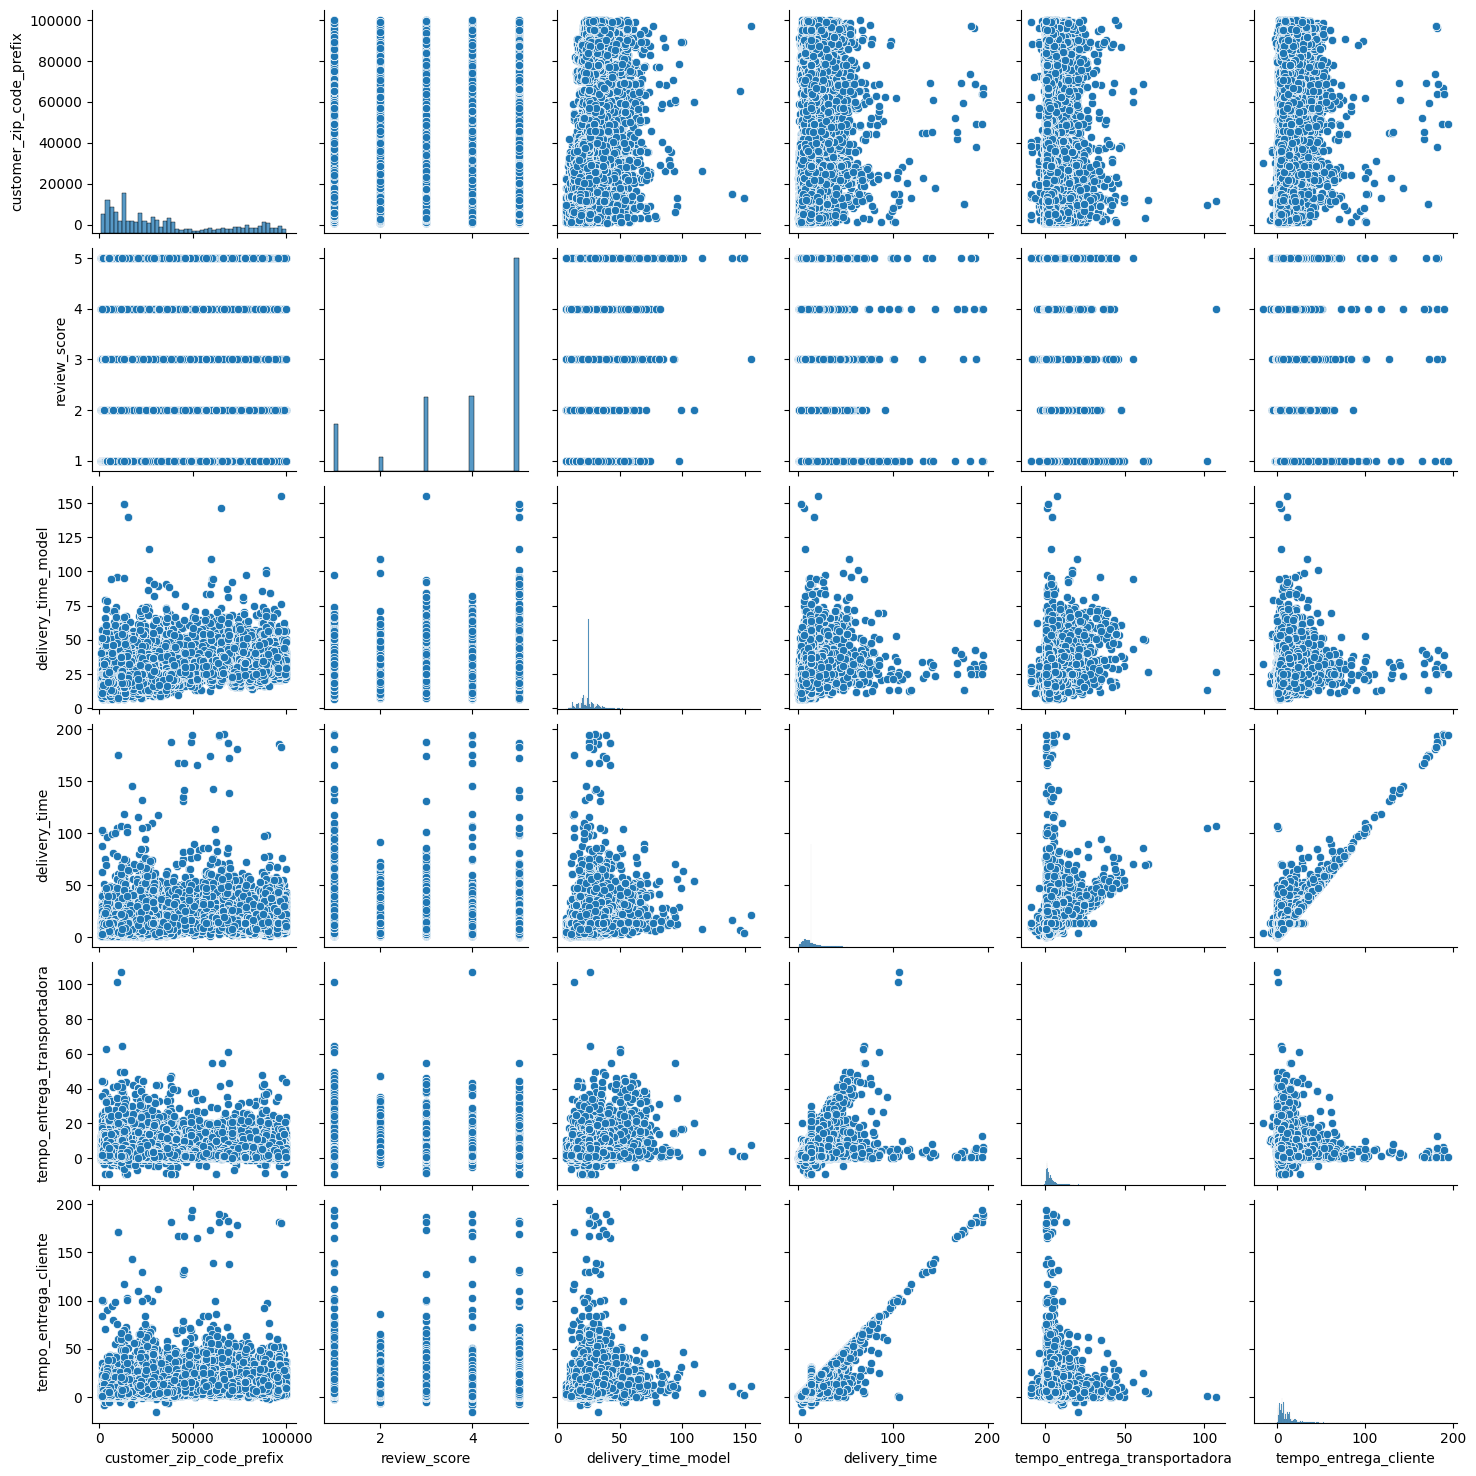

In [26]:
df_corr = df[['customer_zip_code_prefix', 'review_score', 'delivery_time_model', 'delivery_time', 'tempo_entrega_transportadora', 'tempo_entrega_cliente']]

sns.pairplot(df_corr)

In [31]:
df_corr[df_corr['tempo_entrega_cliente']<0]

,customer_zip_code_prefix,review_score,delivery_time_model,delivery_time,tempo_entrega_transportadora,tempo_entrega_cliente
4329,18550,3,24.530000,5.340000,7.426898,-2.892384
4330,18550,3,24.530000,5.340000,7.426898,-2.892384
4331,18550,3,24.530000,5.340000,7.426898,-2.892384
6489,33600,1,18.130000,3.730000,4.841910,-1.121412
6490,33600,1,18.130000,3.730000,4.841910,-1.121412
9140,9791,3,22.480000,13.774678,2.554306,-1.214282
9823,36500,2,21.130000,5.880000,10.276609,-6.009954
9824,36500,2,21.130000,5.880000,10.276609,-6.009954
9825,36500,2,21.130000,5.880000,10.276609,-6.009954
9826,36500,2,21.130000,5.880000,10.276609,-6.009954


In [32]:
df_corr[df_corr['tempo_entrega_cliente']<0].count()

customer_zip_code_prefix        53
review_score                    53
delivery_time_model             53
delivery_time                   53
tempo_entrega_transportadora    53
tempo_entrega_cliente           53
dtype: int64

In [33]:
df_corr = df_corr[df_corr['tempo_entrega_cliente']>0]

In [35]:
df_corr[df_corr['tempo_entrega_transportadora']<0]

,customer_zip_code_prefix,review_score,delivery_time_model,delivery_time,tempo_entrega_transportadora,tempo_entrega_cliente
41,36045,4,22.63,2.450000,-0.962593,1.008843
42,36045,4,22.63,2.450000,-0.962593,1.008843
1268,89130,1,31.65,13.774678,-0.066389,17.002431
1269,89130,1,31.65,13.774678,-0.066389,17.002431
1312,15990,5,25.38,9.940000,-3.713241,9.486493
...,...,...,...,...,...,...
67398,11704,2,21.48,8.810000,-2.409699,5.842766
67524,5020,4,17.15,13.774678,-0.806782,1.006898
67525,5020,4,17.15,13.774678,-0.806782,1.006898
67695,57035,1,30.89,47.730000,-4.222083,46.081157


In [36]:
df_corr = df_corr[df_corr['tempo_entrega_transportadora']>0]

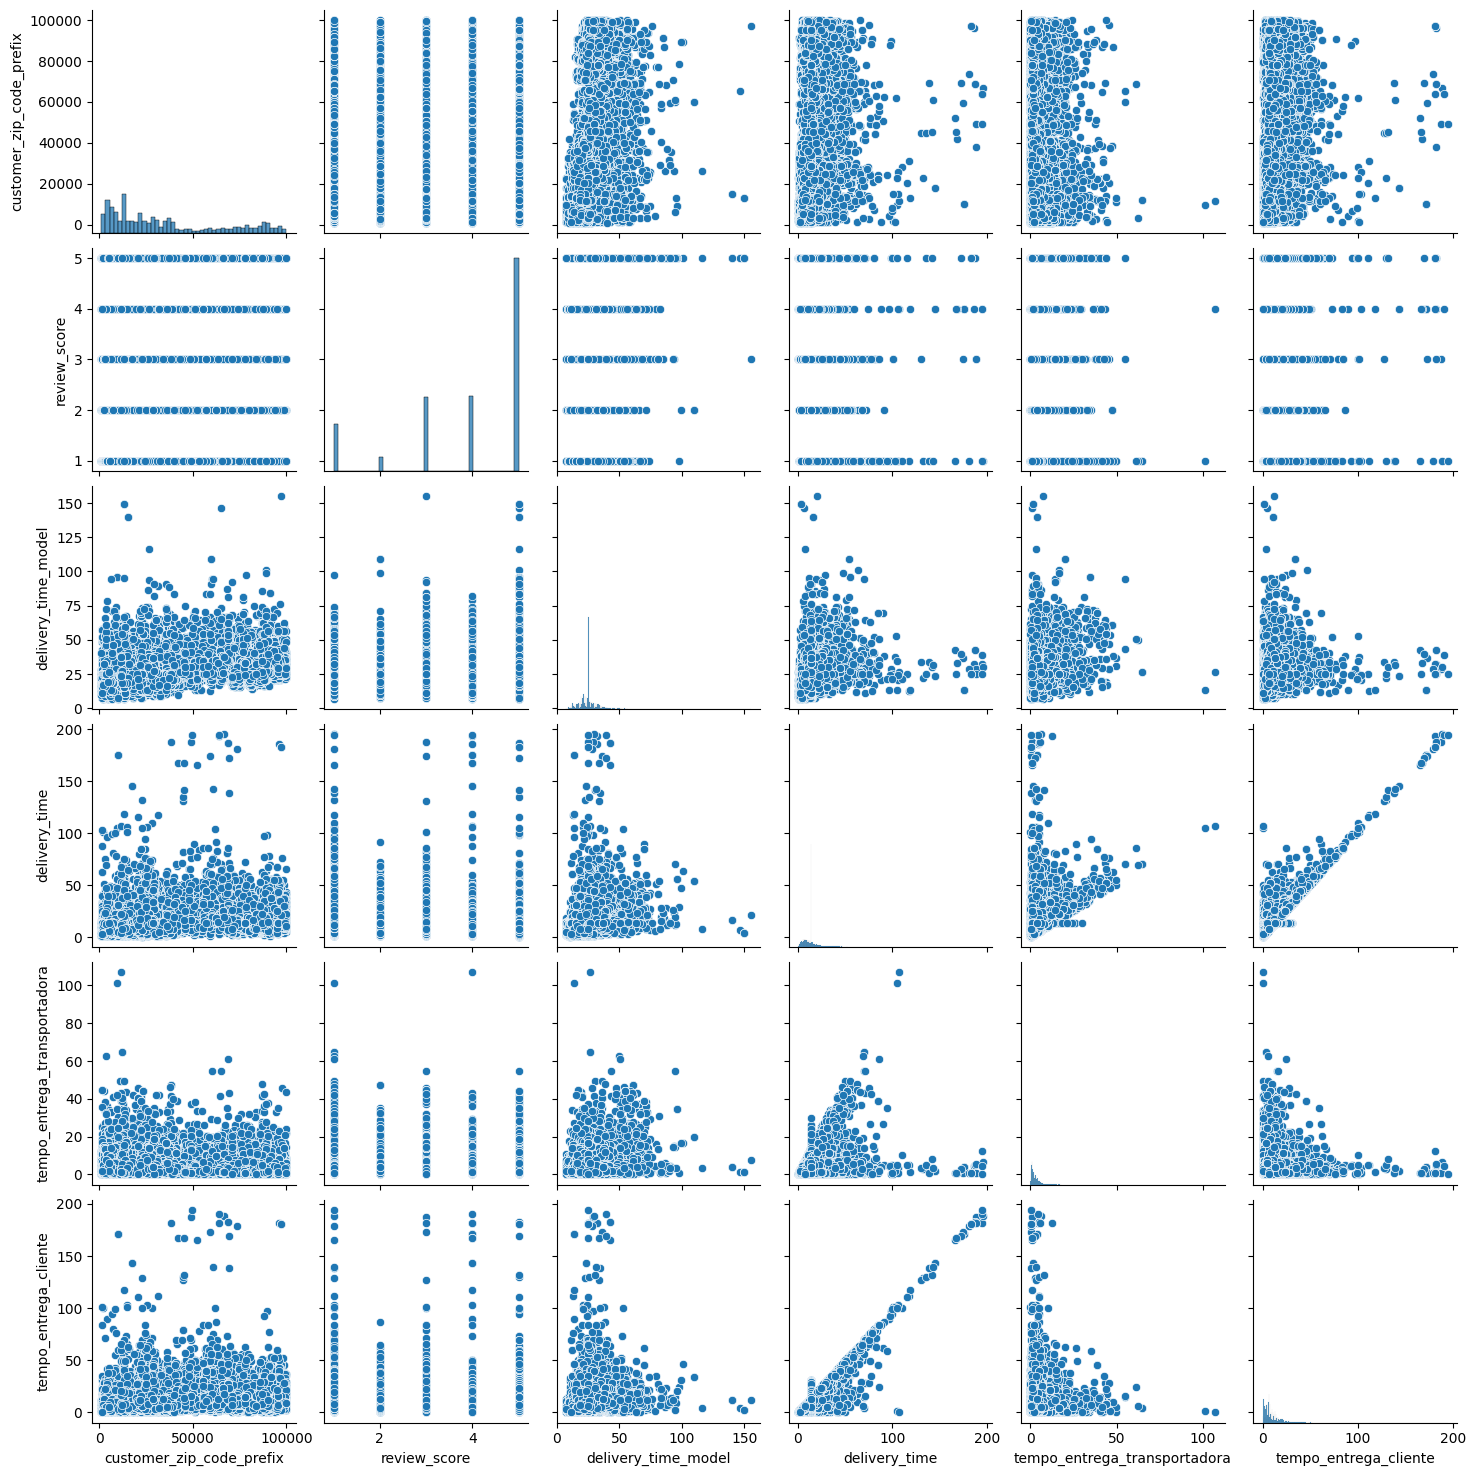

In [37]:
sns.pairplot(df_corr)